## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset. 
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. 
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Lucy Zhang
### UNI: xz3141

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Feel free to import any other packages you need

### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [3]:
# Your Code Here
raw_df.shape[0]

# there are 284807 observations in the dataset

284807

In [4]:
print(raw_df[raw_df['Class']==1].shape[0], 'are positive')
print(raw_df[raw_df['Class']==0].shape[0], 'are negative')

492 are positive
284315 are negative


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column. 
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [5]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount') + eps)

**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [6]:
# Your Code Here
from sklearn.model_selection import train_test_split
y = cleaned_df['Class']
X = cleaned_df.drop(columns=['Class'])
X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
print(X_dev.shape,X_test.shape)

(227845, 29) (56962, 29)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [8]:
# Your Code Here
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_dev=scalar.fit_transform(X_dev)
X_test=scalar.transform(X_test)

### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [9]:
# Your Code Here
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [10]:
score = ['roc_auc', 'average_precision']
dt = DecisionTreeClassifier(max_depth=10,random_state=42)
cv = cross_validate(dt, X_dev, y_dev, cv=5, scoring=score,verbose=True)
print(cv)
dt.fit(X_dev,y_dev)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.7s finished


{'fit_time': array([6.59496188, 6.47882581, 6.54928207, 6.4820981 , 6.54897976]), 'score_time': array([0.01296377, 0.01170802, 0.01296186, 0.01191998, 0.01127625]), 'test_roc_auc': array([0.86957634, 0.82799822, 0.83798122, 0.88266235, 0.90893353]), 'test_average_precision': array([0.64646286, 0.6763446 , 0.61677062, 0.68317716, 0.68281098])}


DecisionTreeClassifier(max_depth=10, random_state=42)

In [11]:
# AUC
cv['test_roc_auc']

array([0.86957634, 0.82799822, 0.83798122, 0.88266235, 0.90893353])

In [13]:
# average precision value
cv['test_average_precision']

array([0.64646286, 0.6763446 , 0.61677062, 0.68317716, 0.68281098])

### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Your Code Here
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev, y_dev)

In [16]:
print(y_dev_oversample[y_dev_oversample==1].shape[0], 'are positive')
print(y_dev_oversample[y_dev_oversample==0].shape[0], 'are negative')

227451 are positive
227451 are negative


In [17]:
print("shape of X_dev: ", X_dev_oversample.shape)
print("shape of y_dev: ", y_dev_oversample.shape)

shape of X_dev:  (454902, 29)
shape of y_dev:  (454902,)


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [18]:
# Your Code Here
score_ros = ['roc_auc', 'average_precision']
dt_ros = DecisionTreeClassifier(max_depth=10,random_state=42)
cv_ros = cross_validate(dt_ros, X_dev_oversample, y_dev_oversample, cv=5, scoring=score_ros,verbose=True)
print(cv_ros)
dt_ros.fit(X_dev_oversample,y_dev_oversample)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.8s finished


{'fit_time': array([7.32540321, 7.03921294, 7.08225417, 7.11276102, 7.06700516]), 'score_time': array([0.03727293, 0.02534294, 0.02546191, 0.02482677, 0.02429199]), 'test_roc_auc': array([0.99840012, 0.9983086 , 0.99847279, 0.99847804, 0.99857557]), 'test_average_precision': array([0.99786268, 0.99767719, 0.9978636 , 0.99787444, 0.99807898])}


DecisionTreeClassifier(max_depth=10, random_state=42)

In [19]:
# AUC
cv_ros['test_roc_auc']

array([0.99840012, 0.9983086 , 0.99847279, 0.99847804, 0.99857557])

In [20]:
# average precision value
cv_ros['test_average_precision']

array([0.99786268, 0.99767719, 0.9978636 , 0.99787444, 0.99807898])

In [21]:
# both AUC and average precison value have significantly increased

### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [22]:
# Your Code Here
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_dev_subsample, y_dev_subsample = rus.fit_resample(X_dev, y_dev)

In [23]:
print(y_dev_subsample[y_dev_subsample==1].shape[0], 'are positive')
print(y_dev_subsample[y_dev_subsample==0].shape[0], 'are negative')

394 are positive
394 are negative


In [24]:
print("shape of X_dev: ", X_dev_subsample.shape)
print("shape of y_dev: ", y_dev_subsample.shape)

shape of X_dev:  (788, 29)
shape of y_dev:  (788,)


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [25]:
# Your Code Here

score_us = ['roc_auc', 'average_precision']
dt_us = DecisionTreeClassifier(max_depth=10,random_state=42)
cv_us = cross_validate(dt_us, X_dev_subsample, y_dev_subsample, cv=5, scoring=score_us,verbose=True)
print(cv_us)
dt_us.fit(X_dev_subsample,y_dev_subsample)

{'fit_time': array([0.02273893, 0.01199484, 0.01119924, 0.00874209, 0.00882983]), 'score_time': array([0.00453305, 0.00335407, 0.001266  , 0.00116897, 0.00120425]), 'test_roc_auc': array([0.8852748 , 0.86388399, 0.89873418, 0.91731581, 0.94790652]), 'test_average_precision': array([0.82838644, 0.81661392, 0.86683544, 0.87531025, 0.92073059])}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


DecisionTreeClassifier(max_depth=10, random_state=42)

In [26]:
# AUC
cv_us['test_roc_auc']

array([0.8852748 , 0.86388399, 0.89873418, 0.91731581, 0.94790652])

In [27]:
# average precision value
cv_us['test_average_precision']

array([0.82838644, 0.81661392, 0.86683544, 0.87531025, 0.92073059])

In [34]:
# this is better than the model before sampling, but no better than performing oversampling

### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [28]:
# Your Code Here
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

In [29]:
print(y_dev_smote[y_dev_smote==1].shape[0], 'are positive')
print(y_dev_smote[y_dev_smote==0].shape[0], 'are negative')

227451 are positive
227451 are negative


In [30]:
print("shape of X_dev: ", X_dev_smote.shape)
print("shape of y_dev: ", X_dev_smote.shape)

shape of X_dev:  (454902, 29)
shape of y_dev:  (454902, 29)


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [31]:
# Your Code Here

score_smote = ['roc_auc', 'average_precision']
dt_smote = DecisionTreeClassifier(max_depth=10,random_state=42)
cv_smote = cross_validate(dt_smote, X_dev_smote, y_dev_smote, cv=5, scoring=score_smote,verbose=True)
print(cv_smote)
dt_smote.fit(X_dev_smote,y_dev_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


{'fit_time': array([13.63128304, 12.44942188, 12.43559504, 12.41603589, 12.35749984]), 'score_time': array([0.07105923, 0.02876997, 0.03001189, 0.02774715, 0.028332  ]), 'test_roc_auc': array([0.99729603, 0.99747394, 0.99713467, 0.99703584, 0.99724342]), 'test_average_precision': array([0.99658165, 0.99656764, 0.99603047, 0.99593317, 0.99618909])}


DecisionTreeClassifier(max_depth=10, random_state=42)

In [32]:
# AUC
cv_smote['test_roc_auc']

array([0.99729603, 0.99747394, 0.99713467, 0.99703584, 0.99724342])

In [34]:
# average precision value
cv_smote['test_average_precision']

array([0.99658165, 0.99656764, 0.99603047, 0.99593317, 0.99618909])

### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [35]:
# Your Code Here

score_bw = ['roc_auc', 'average_precision']
bw = DecisionTreeClassifier(max_depth=10,random_state=42,class_weight='balanced')
cv_bw = cross_validate(bw, X_dev, y_dev, cv=5, scoring=score_bw,verbose=True)
print(cv_bw)
bw.fit(X_dev,y_dev)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.0s finished


{'fit_time': array([6.36964869, 4.67105103, 5.19389892, 4.63878107, 4.99680305]), 'score_time': array([0.01363206, 0.01087713, 0.01183414, 0.01046014, 0.01223612]), 'test_roc_auc': array([0.9053394 , 0.90420916, 0.88501785, 0.91692054, 0.92351567]), 'test_average_precision': array([0.63963546, 0.61345204, 0.61983563, 0.63412551, 0.61125666])}


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [36]:
# AUC
cv_bw['test_roc_auc']

array([0.9053394 , 0.90420916, 0.88501785, 0.91692054, 0.92351567])

In [37]:
# average precision value
cv_bw['test_average_precision']

array([0.63963546, 0.61345204, 0.61983563, 0.63412551, 0.61125666])

### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [38]:
# Your Code Here

from sklearn import metrics
from sklearn.metrics import roc_curve, auc

y_pred = dt.predict(X_test)

In [39]:
y_pred_rus = dt_us.predict(X_test)

In [40]:
y_pred_ros = dt_ros.predict(X_test)

In [41]:
y_pred_smote = dt_smote.predict(X_test)

In [42]:
y_pred_bw = bw.predict(X_test)

In [43]:
# AUC
(fpr_db, tpr_db, thresholds_db) = metrics.roc_curve(y_test,dt.predict_proba(X_test)[:,1])
AUC_db = auc(fpr_db,tpr_db)

(fpr_us, tpr_us, thresholds_us) = metrics.roc_curve(y_test,dt_us.predict_proba(X_test)[:,1])
AUC_us = auc(fpr_us,tpr_us)

(fpr_ros, tpr_ros, thresholds_ros) = metrics.roc_curve(y_test,dt_ros.predict_proba(X_test)[:,1])
AUC_ros = auc(fpr_ros,tpr_ros)

(fpr_smote, tpr_smote, thresholds_smote) = metrics.roc_curve(y_test,dt_smote.predict_proba(X_test)[:,1])
AUC_smote = auc(fpr_smote,tpr_smote)

(fpr_bw, tpr_bw, thresholds_bw) = metrics.roc_curve(y_test,bw.predict_proba(X_test)[:,1])
AUC_bw = auc(fpr_bw,tpr_bw)

In [44]:
print("AUC for default baseline model: ", AUC_db)
print("AUC for default Random Undersampling: ", AUC_us)
print("AUC for default Random Oversampling: ", AUC_ros)
print("AUC for default SMOTE: ", AUC_smote)
print("AUC for default Balanced Weight: ", AUC_bw)

AUC for default baseline model:  0.871912253224306
AUC for default Random Undersampling:  0.9050787485787788
AUC for default Random Oversampling:  0.8609190528349776
AUC for default SMOTE:  0.8893473364303515
AUC for default Balanced Weight:  0.8432507780827582


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


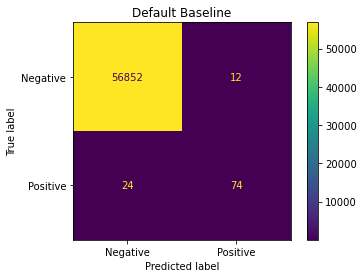

In [45]:
# Your Code Here

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

labels = ['Negative', 'Positive']
plot_confusion_matrix(dt, X_test, y_test, display_labels=labels)
plt.title('Default Baseline')
plt.show()                   

/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


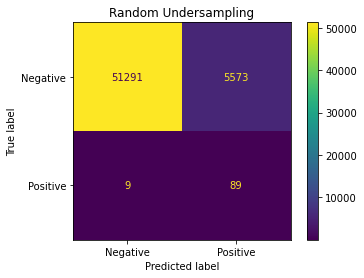

In [46]:
plot_confusion_matrix(dt_us, X_test, y_test, display_labels=labels)
plt.title('Random Undersampling')
plt.show()

/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


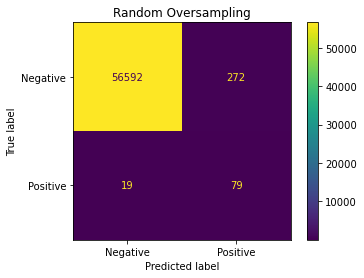

In [47]:
plot_confusion_matrix(dt_ros, X_test, y_test, display_labels=labels)
plt.title('Random Oversampling')
plt.show()

/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


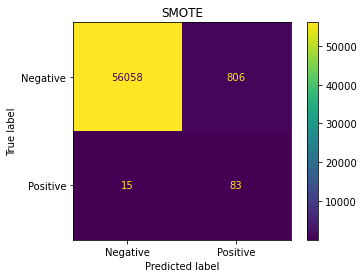

In [48]:
plot_confusion_matrix(dt_smote, X_test, y_test, display_labels=labels)
plt.title('SMOTE')
plt.show()

/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


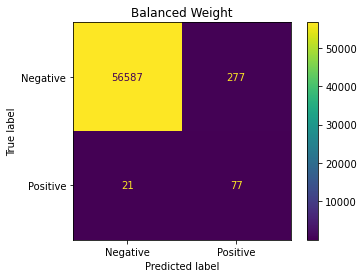

In [49]:
plot_confusion_matrix(bw, X_test, y_test, display_labels=labels)
plt.title("Balanced Weight")
plt.show()  

In [51]:
# comments: before using the sampling methods, the default model is likely to assign nearly all points as negative.
# this is because of the data imbalances. Among the 4 sampling methods, random undersampling assigns more predicted
# value as positive compared with the other 3.

**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

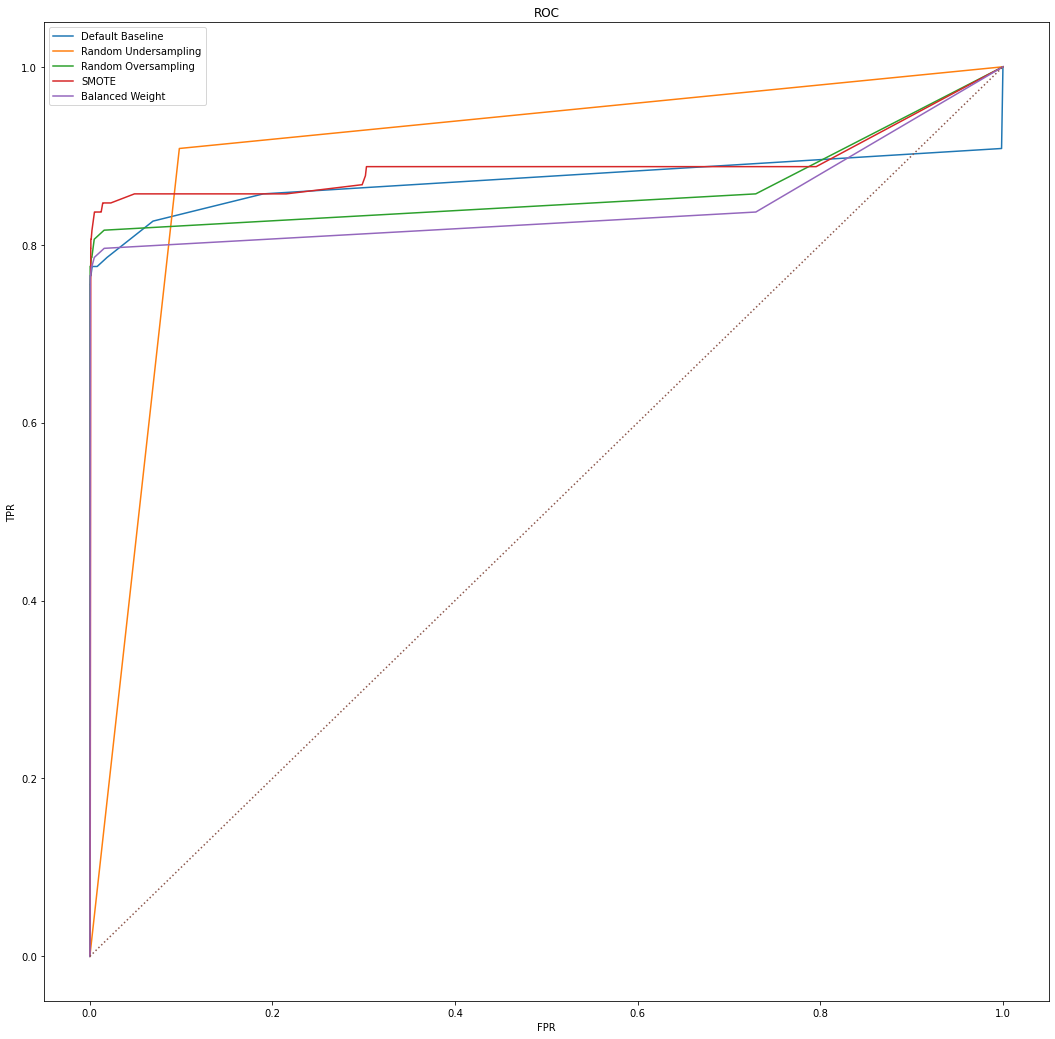

In [50]:
# Your Code Here

plt.figure(figsize=(18,18))
plt.plot(fpr_db, tpr_db, label='Default Baseline')
plt.plot(fpr_us, tpr_us, label='Random Undersampling')
plt.plot(fpr_ros, tpr_ros, label='Random Oversampling')
plt.plot(fpr_smote, tpr_smote, label='SMOTE')
plt.plot(fpr_bw, tpr_bw, label='Balanced Weight')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1], linestyle=':')
plt.title('ROC')
plt.legend()

In [ ]:
# According to the graph, we can see that the random undersampling model has the highest AUC, meaning that 
# it is more stable in response to changes of threshold. The other 4 models are quite close in their AUC.